# Question 24-29

# Environment set

In [1]:
import csv
import numpy as np
import os
np.random.seed(42)
import random
random.seed(42)

def popTrim(testset, movieFreq):
    return [x for x in testset if movieFreq[int(x[1])] > 2]

def unpopTrim(testset, movieFreq):
    return [x for x in testset if movieFreq[int(x[1])] <= 2]

def highVarTrim(testset, movieFreq, movieVar):
    return [x for x in testset if movieVar[int(x[1])] >= 2 and movieFreq[int(x[1])] >= 5]

file_ratings = os.path.expanduser('ml-latest-small/ratings.csv')
file_movies = os.path.expanduser('ml-latest-small/movies.csv')

user_id = []
movie_id = []
ratings = []

with open(file_ratings) as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        user_id.append(int(row['userId']))
        movie_id.append(int(row['movieId']))
        ratings.append(float(row['rating']))

user_number = len(np.unique(user_id))
movie_number = len(np.unique(movie_id))
movie_list = dict()
movie_id_u=[]
movie_idx = 0
for id in movie_id:
    if id not in movie_id_u:
        movie_list[id]=int(movie_idx)
        movie_id_u.append(id)
        movie_idx += 1
        
total_available_rating = len(user_id)
total_possible_rating = user_number * movie_number
print('Number of Users:', user_number)
print('Number of Rated Movies:', movie_number)
print('Sparsity =', float(total_available_rating) / total_possible_rating)
R = np.zeros((user_number, movie_number))  
W = np.zeros((user_number, movie_number))
for i in range(len(user_id)):
    x = user_id[i] - 1
    y = int(movie_list[movie_id[i]])
    R[x,y] = ratings[i]
    W[x,y] = 1
movieFreq = np.sum(R != 0, axis = 0)
movieFreq_dict = {m: movieFreq[movie_list[m]] for m in movie_list.keys()}
movieVar = [np.var([e for e in row if e != 0]) for row in np.transpose(R)]
movieVar_dict = {m: movieVar[movie_list[m]] for m in movie_list.keys()}        

Number of Users: 610
Number of Rated Movies: 9724
Sparsity = 0.016999683055613623


# SVD

In [2]:
from surprise.model_selection import cross_validate
from surprise import KNNWithMeans
from surprise import Reader, Dataset
from surprise.model_selection import KFold
from surprise import accuracy
from surprise import SVD
reader = Reader(line_format='user item rating timestamp', sep=',', skip_lines=1)
data = Dataset.load_from_file('ml-latest-small/ratings.csv', reader)

# Question 24

In [3]:
kf=KFold(n_splits=10)
k_Values=range(2,52,2)
RMSE_10=[]
MAE_10=[]
index_list=range(0,10)
for k in k_Values:
    
    algo=SVD(n_factors=k)
    RMSE_kf=[]
    MAE_kf=[]
    for trainset, testset in kf.split(data):
        algo.fit(trainset)
        predictions=algo.test(testset)
        RMSE_kf.append(accuracy.rmse(predictions,verbose=False))
        MAE_kf.append(accuracy.mae(predictions,verbose=False))
    RMSE_10.append(np.mean(RMSE_kf))
    MAE_10.append(np.mean(MAE_kf))
    
    

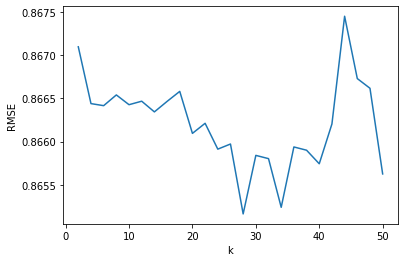

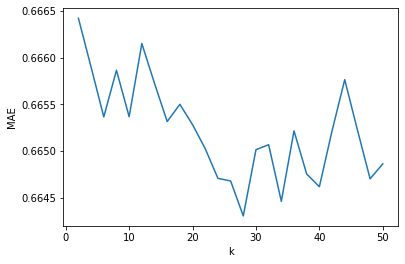

In [6]:
import matplotlib.pyplot as plt
plt.plot(k_Values, RMSE_10)
# plt.title("Average RMSE with 10-fold cross validation")
plt.xlabel('k')
plt.ylabel('RMSE')
plt.show()

plt.plot(k_Values, MAE_10)
# plt.title("Average MAE with 10-fold cross validation")
plt.xlabel('k')
plt.ylabel('MAE')
plt.show()

# Question 25

In [8]:
print('min average of RMSE=',min(RMSE_10) )
print('k of min average of RMSE is ',k_Values[np.argmin(RMSE_10)] )
print('min average of MAE=',min(MAE_10) )
print('k of min average of MAE is ',k_Values[np.argmin(MAE_10)] )

min average of RMSE= 0.8651653995127468
k of min average of RMSE is  28
min average of MAE= 0.6643070049892645
k of min average of MAE is  28


# Question 26, 27, 28

In [9]:
kf=KFold(n_splits=10)
k_Values=range(2,52,2)
RMSE_10_pop=[]
MAE_10_pop=[]
RMSE_10_unpop=[]
MAE_10_unpop=[]
RMSE_10_hV=[]
MAE_10_hV=[]
index_list=range(0,10)
for k in k_Values:
    
    algo=SVD(n_factors=k)
    RMSE_kf_pop=[]
    MAE_kf_pop=[]
    RMSE_kf_unpop=[]
    MAE_kf_unpop=[]
    RMSE_kf_hV=[]
    MAE_kf_hV=[]
    
    for trainset, testset in kf.split(data):
        algo.fit(trainset)
        
        predictions_pop=algo.test(popTrim(testset, movieFreq_dict))
        predictions_unpop=algo.test(unpopTrim(testset, movieFreq_dict))
        predictions_hV=algo.test(highVarTrim(testset, movieFreq_dict, movieVar_dict))
        
        RMSE_kf_pop.append(accuracy.rmse(predictions_pop,verbose=False))
        MAE_kf_pop.append(accuracy.mae(predictions_pop,verbose=False))
        RMSE_kf_unpop.append(accuracy.rmse(predictions_unpop,verbose=False))
        MAE_kf_unpop.append(accuracy.mae(predictions_unpop,verbose=False))
        RMSE_kf_hV.append(accuracy.rmse(predictions_hV,verbose=False))
        MAE_kf_hV.append(accuracy.mae(predictions_hV,verbose=False))
        
    RMSE_10_pop.append(np.mean(RMSE_kf_pop))
    MAE_10_pop.append(np.mean(MAE_kf_pop))
    RMSE_10_unpop.append(np.mean(RMSE_kf_unpop))
    MAE_10_unpop.append(np.mean(MAE_kf_unpop))
    RMSE_10_hV.append(np.mean(RMSE_kf_hV))
    MAE_10_hV.append(np.mean(MAE_kf_hV))





# Question 26

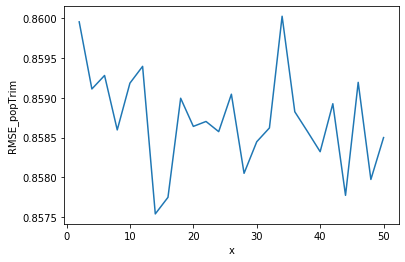

min average of RMSE= 0.8575417048927625
k of min average of RMSE is  14


In [10]:
plt.plot(k_Values,RMSE_10_pop)
plt.xlabel('x')
plt.ylabel('RMSE_popTrim')
plt.show()

print('min average of RMSE=',min(RMSE_10_pop) )
print('k of min average of RMSE is ',k_Values[np.argmin(RMSE_10_pop)] )

# Question 27

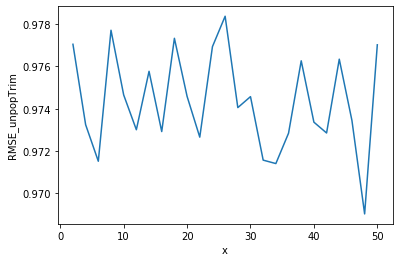

min average of RMSE= 0.9690233429548106
k of min average of RMSE is  48


In [11]:
plt.plot(k_Values,RMSE_10_unpop)
plt.xlabel('x')
plt.ylabel('RMSE_unpopTrim')
plt.show()

print('min average of RMSE=',min(RMSE_10_unpop) )
print('k of min average of RMSE is ',k_Values[np.argmin(RMSE_10_unpop)] )

# Question 28

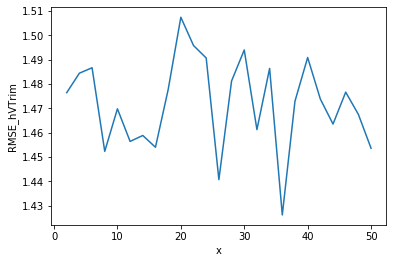

min average of RMSE= 1.4262022977528828
k of min average of RMSE is  36


In [12]:
plt.plot(k_Values,RMSE_10_hV)
plt.xlabel('x')
plt.ylabel('RMSE_hVTrim')
plt.show()

print('min average of RMSE=',min(RMSE_10_hV) )
print('k of min average of RMSE is ',k_Values[np.argmin(RMSE_10_hV)] )

# Question 29

In [13]:
def plot_roc(fpr, tpr):
    fig, ax = plt.subplots()

    roc_auc = auc(fpr,tpr)

    ax.plot(fpr, tpr, lw=2, label= 'area under curve = %0.4f' % roc_auc)

    ax.grid(color='0.7', linestyle='--', linewidth=1)

    ax.set_xlim([-0.1, 1.1])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate',fontsize=15)
    ax.set_ylabel('True Positive Rate',fontsize=15)

    ax.legend(loc="lower right")

    for label in ax.get_xticklabels()+ax.get_yticklabels():
        label.set_fontsize(15)

threshold =  2.5


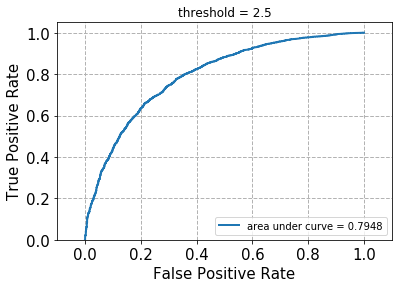

threshold =  3


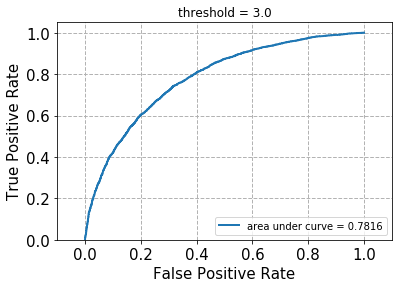

threshold =  3.5


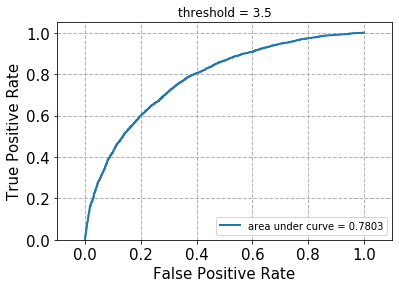

threshold =  4


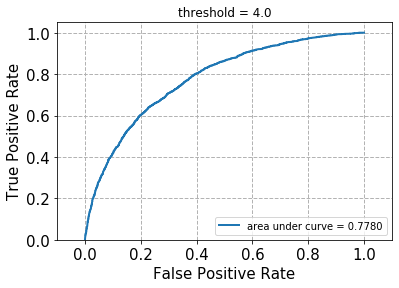

In [15]:
from surprise.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
thresholds=[2.5, 3, 3.5, 4]
trainset, testset = train_test_split(data, test_size=0.1)
algo = SVD(n_factors=28)
algo.fit(trainset)
prediction__ = algo.test(testset)

for t in thresholds:
    print('threshold = ', t)
    y = [1 if pred[2] > t else 0 for pred in prediction__]
    scores = [pred[3] for pred in prediction__]
    fpr, tpr, _ = roc_curve(y, scores)
    plot_roc(fpr, tpr)
    plt.title('threshold = %.1f' % t)
    plt.show()